# Viikko 1


Olin paikalla ensimmäisellä luennolla 9.3., jolloin luennolla käytiin läpi kurssin sisältöä sekä suoritusvaatimuksia ja tutustuttiin datatieteen perusteisiin. Vaikka luennolla ei tullut itselleni paljoakaan uutta asiaa, luento kasvatti mielenkiintoani ja motivaatiotani kurssin suorittamista kohtaan.

Tietojohtamisen opiskelijana moni asia oli minulle tuttua, esimerkiksi tiedon tasot ja luennolla esitetyt mallit (Data Science Lifecyclen lisäksi myös CRISP-DM-malli esitellään TIJO.220 Basics for Business Data Analytics-kurssilla), mutta mukana oli myös hieman uusia näkökulmia. Muita malleja, joihin kursseilla on viitattu, ovat esimerkiksi APREM-DM ja LTDM. Suoritan tällä hetkellä TIJO.324 Data-analytiikka päätöksenteossa-kurssia, jossa aloitusluennolla käytiin hyvin samanlaisia teemoja läpi, mutta esimerkiksi datatieteilijän kompetensseissa oli huomioitu vain matematiikka, ohjelmointi ja liiketoiminta. Mielestäni tämän kurssin materiaalissa esitetty Venn-diagrammi antaa todenmukaisemman kuvan, sillä viestintä on todella tärkeä taito datatieteilijälle: Analyysin tulokset on osattava viestiä ja visualisoida onnistuneesti, jotta niistä on päätöksentekijöille hyötyä. Vaikka koko muu data-analytiikan prosessi oltaisiin tehty täydellisesti, voi huono viestintä aiheuttaa sen, että saavutettu hyöty on yhtä tyhjän kanssa.

Luentomateriaalissa esiin tuotu Hans Roslingin video on erinomainen, ja tuo hyvin esiin sen, että datatieteilijällä on valta valita, millaisesta näkökulmasta hän lähtee tutkimaan dataa. Analyytikon valinnoilla voi olla suuri vaikutus, siihen miltä löydökset näyttävät lopussa, vaikka hän ei itse edes huomaisi, miten on lopputulokseen vaikuttanut. Tähän liittyy vahvasti dataan liittyvät eettiset kysymykset, joita Lou ja Yang (2020) käsittelivät artikkelissaan. Erityisesti terveystietoja käsittelevä data on mielestäni hyvin arkaluonteista ja artikkelissa olikin tästä hyvä esimerkki, kuinka apteekit ovat käyttäneet saamaansa terveysdataa markkinoidakseen tuotteita kohdistetusti.

Viittaus etnografiaan oli mielenkiintoinen. Olen sivuaineena opiskellut sosiaalitieteitä ja muun muassa antropologiaa, jossa etnografinen tutkimus on aivan keskiössä. Ennen vertauksen kuulemista pidin antropologin ja data-analyytikon työtehtäviä suurin piirtein niin erilaisina kuin mahdollista, mutta on hyvinkin totta, että dataa tutkiessa on ymmärrettävä mistä se on peräisin, millaisia asioita datasta halutaan selvittää eli millainen data on arvokasta ja tärkeää sekä ymmärtää ympäröivä liiketoimintakonteksti. Samoin antropologi haluaa ihmisryhmää seuratessaan oppia ymmärtämään ryhmän historiaa, arvoja, kulttuuria ja ympäristöä. Metodit ihmisryhmien ja datan tutkimiseen voivat olla erilaiset, mutta ydinkysymykset tutkimisessa ovat yllättävän lähellä toisiaan. Koska aihe oli niin mielenkiintoinen, tutustuin luennolla vinkattuun Lindgrenin "Data Theory"-kirjaan (kirja löytyi Andorista). Kirjassa korostettiin muun muassa sitä, että laadullisia ja määrällisiä menetelmiä voi olla vaikea soveltaa yhdessä, mutta tällainen tutkimus olisi ensiarvoisen tärkeää, sillä ilman molempia tutkimustapoja esimerkiksi sosiaalisista ilmiöistä tulee yksipuolinen kuva.

Tavoitteinani kurssille on oppia käyttämään uusia työkaluja (mm. Jupyter Notebook, Pandas), parantaa koodaustaitojani, oppia koneoppimisen perusteita ja harjoitella harjoitustyön kautta, miten käytännössä data-analytiikkaa voidaan tehdä. Tekninen osaamiseni ei ole kovin vahvaaa, joten pyrin keskittymään kurssilla erityisten uusien työkalujen oppimiseen ja teknisen ymmärtämisen kasvattamiseen.

Seuraavaki teen yksinkertaisia koodiajoja demo-sessiossa oppimani pohjalta. Koodien pohjana käytetään demosessiossa käytettyjä koodeja.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [6]:
url = 'https://github.com/jodatut/2020/raw/master/koodiesimerkit/SalesJan2009.csv'

orig_df = pd.read_csv(url)

# Tehdään kopio, jotta alkuperäinen data säilyy
df = orig_df.copy()
print('List of attributes:', df.columns.values.tolist())

List of attributes: ['Transaction_date', 'Product', 'Price', 'Payment_Type', 'Name', 'City', 'State', 'Country', 'Account_Created', 'Last_Login', 'Latitude', 'Longitude']


In [13]:
# Selvitetään, missä maissa transaktioita on tehty
countries = []
def country_list(x):
    for x in df['Country']:
        if x in countries:
            pass
        else:
            countries.append(x)
            
country_list(df['Country'])
        
print (countries)  

['United Kingdom', 'United States', 'Australia', 'Israel', 'France', 'Netherlands', 'Ireland', 'Canada', 'India', 'South Africa', 'Finland', 'Switzerland', 'Denmark', 'Belgium', 'Sweden', 'Norway', 'Luxembourg', 'Italy', 'Germany', 'Moldova', 'Spain', 'United Arab Emirates', 'Bahrain', 'Turkey', 'Kuwait', 'Malta', 'Hungary', 'Austria', 'Jersey', 'Malaysia', 'Iceland', 'South Korea', 'Brazil', 'New Zealand', 'Russia', 'Monaco', 'Hong Kong', 'Thailand', 'Bulgaria', 'Latvia', 'Poland', 'Philippines', 'Argentina', 'The Bahamas', 'Japan', 'Czech Republic', 'Cayman Isls', 'Ukraine', 'Dominican Republic', 'China', 'Greece', 'Costa Rica', 'Bermuda', 'Romania', 'Guatemala', 'Mauritius']


In [16]:
#Tehdään maakohtainen pylväsdiagrammi transaktioihin käytetyn rahan mukaan, jossa mukana 5 suosituinta maata

# Selvitetään, kuinka paljon transaktioita on missäkin maassa
payment_values = df['Country'].value_counts()
print(payment_values)

United States           464
United Kingdom          101
Canada                   76
Ireland                  49
Australia                38
Switzerland              36
France                   27
Germany                  25
Netherlands              22
Norway                   16
Denmark                  15
Italy                    15
Sweden                   13
Spain                    12
Belgium                   8
Austria                   7
Turkey                    6
New Zealand               6
United Arab Emirates      6
South Africa              5
Brazil                    5
Hungary                   3
Czech Republic            3
Philippines               2
Poland                    2
The Bahamas               2
Finland                   2
Japan                     2
Malta                     2
India                     2
Thailand                  2
Monaco                    2
Cayman Isls               1
Bermuda                   1
Guatemala                 1
Ukraine             

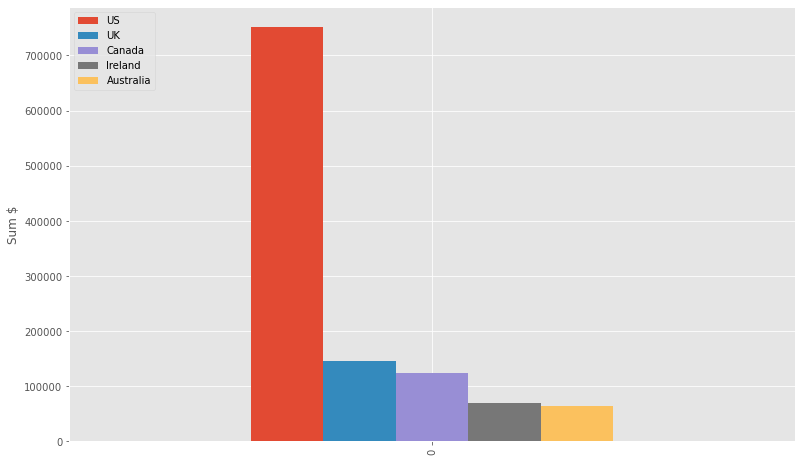

In [17]:
US = df.loc[:,['Price', 'Country']]
US = US[US['Country'] == 'United States']

UK = df.loc[:,['Price', 'Country']]
UK = UK[UK['Country'] == 'United Kingdom']

Canada = df.loc[:,['Price', 'Country']]
Canada = Canada[Canada['Country'] == 'Canada']

Ireland = df.loc[:,['Price', 'Country']]
Ireland = Ireland[Ireland['Country'] == 'Ireland']

Australia = df.loc[:,['Price', 'Country']]
Australia = Australia[Australia['Country'] == 'Australia']

sum_US = sum(US['Price'])
sum_UK = sum(UK['Price'])
sum_Canada = sum(Canada['Price'])
sum_Ireland = sum(Ireland['Price'])
sum_Australia = sum(Australia['Price'])

df_plot = pd.DataFrame([[sum_US, sum_UK, sum_Canada, sum_Ireland, sum_Australia]])
df_plot.columns = ['US', 'UK', 'Canada', 'Ireland', 'Australia']

df_plot.plot.bar(figsize=(13,8))

plt.legend(loc=2)
plt.ylabel('Sum $')
plt.show()

Viisi tärkeintä asiaa tältä viikolta:
1. Viestinnän rooli data-analytiikan prosessissa jää helposti huomiotta, vaikka se on todella tärkeä
2. Jupyter Notebook on datan kanssa työskentelyyn hyvä työkalu, ja sillä on helppoa sekä ajaa koodia että tehdä visualisointeja
3. CRISP-DM on yksi tunnetuimmista ja suosituimmista prosessikuvauksista, jota käytetään dataprosesseissa
4. Datan kanssa työskentelevillä on myös vastuu datan käytöstä ja eettiset näkökulmiin kannattaa kiinnittää huomiota
5. Etnografialla ja datatieteellä voidaan nähdä yllättäviä yhtäläisyyksiä

Lähteet:
- Luento 9.3. (paikan päällä) + demosessio (katsottu tallenteelta)
- Lou & Yang (2020) "A Beginner's Guide to Data Ethics" Saatavilla: https://medium.com/big-data-at-berkeley/things-you-need-to-know-before-you-become-a-data-scientist-a-beginners-guide-to-data-ethics-8f9aa21af742
- Rosling "The best stats you've ever seen" TED-talk Saatavilla: https://www.ted.com/talks/hans_rosling_the_best_stats_you_ve_ever_seen
- Lindgren (2020) "Data Theory: Interpretive Sociology and Computational Methods"

# Viikko 2

Tällä viikolla kävimme aluksi vielä lyhyesti läpi erilaisia prosessimalleja, joita voidaan hyödyntää data-analyysissa. Vaikka asia ei ollut minulle täysin uutta, luento muistutti datan jalostamisen tärkeydestä ja siitä, että siihen kuluu usein suurin osa käytettävästä ajasta. Lisäksi luennoitsija antoi hyvän muistutuksen siitä, että datan jalostajan ennakko-oletukset vaikuttavat siihen, miten dataa jalostetaan. Tämä on mielestäni äärimmäisen tärkeää tiedostaa.

Luennon ennakkolukemisena oli Scott Berinaton (2019) artikkeli, joka oli mielestäni hyvin mielenkiintoinen. Artikkelissa kuvattiin datatieteen muuttumista ajan saatossa ja analytiikkaprosessissa vastaan tulevia suurimpia ongelmia, jotka liittyvät usein raportointiin ja tulosten esittämiseen. Tämä johtuu siitä, että päätösten tekijät ja data-analyytikot eivät välttämättä ymmärrä toisiaan ja liiketoiminnan näkökulma ei välttämättä ole ollut prosessissa tarpeeksi suuressa valossa. Suurin oivallus artikkelissa oli itselleni kuitenkin se, että dataprojektitiimiä muodostettaessa kannattaa keskittyä ammattinimikkeiden sijaan ihmisten taitoihin, eli sen sijaan että tiimiin etsitään data-analyytikkoa, datainsinööriä ja designeria, etsitään projektiin taitoja projektin hallinnasta, datan käsittelystä, data-analyysista, tarinan kerronnasta ja niin edelleen. Tämä oli mielestäni virkistävä näkökulma ja ottaa hyvin huomioon sen, että esimerkiksi jokaisella yksilöllä on omat vahvuutensa. Vaikka nykyisillä opinnoillani tähtään data-analyytikon ammattiin, valmistuin muutamia vuosia sitten filosofian maisteriksi monikielisestä viestinnästä. Toivon, että tulevaisuuden työpaikassani minua ei nähtäisi pelkän "data-analyytikon"-tittelin kautta, vaan pystyisin mahdollisuuksien mukaan hyödyntämään myös viestinnän osaamistani. Luennollakin pohdimme, että kannattaako mieluummin erikoistua niin, että osaa jonkin asian todella hyvin, vai onko parempi omata laaja osaaminen eri asioista, jotka eivät mene niin syvälle. Itse kannatan jälkimmäistä ja nykyään työelämässä on tärkeää kehittää omaa osaamistaan jatkuvasti, joten on tärkeää myös oppia, miten uusia asioita opitaan ja olla motivoitunut tekemään niin.


Luennolla mainittiin lyhyesti "unknown unknows" ja mustat joutsenet. Molemmat termit ovat itselleni tuttuja, ja pidän tärkeänä, että esimerkiksi tiedostamattomien ei-tiedettyjen asioiden (tai mikä ikinä olisikaan näppärä käännös...) olemassaolo tiedostetaan. Tällä en tarkoita, että nämä asiat pyrittäisiin kaikin keinoin löytämään, sillä se ei ole mahdollista, vaan oltaisiin tietoisia, että esimerkiksi projektin aikana vastaan voi tulla asioita, joihin ei voida varautua. Tietynlainen ketteryys ja resilienssi on siis pidettävä mielessä, vaikka projektin suunnittelu tehtäisiin mahdollisimman huolellisesti. Hyvä keino on suosittu "scrum", jota käytetään esimerkiksi ohjelmistoprojekteissa. Scrumin mukaan ohjelmaa luodaan pieni osa kerrallaan, ja tämä mahdollistaa tarvittaessa nopeat muutokset projektissa. Mustat joutsenet ovat puolestaan itselleni tuttu termi Talebin (2007) kirjoittamasta kirjasta "Musta joutsen: Erittäin epätodennäköisen vaikutus". Mustat joutsenet ovat odottamattomia ja erittäin epätodennäköisiä tapahtumia, joita Talebin mukaan kuitenkin todennäköisesti tapahtuu. Taleb käyttää kirjassaan esimerkkiä 9/11-iskusta, mutta mustiksi joutseniksi voidaan nähdä myös COVID-19 ja Ukrainan sota.

Tällä viikolla opimme raapijoista ja ryömijöistä. Molemmat termit olivat itselleni uusia. Raapijoilla ja ryömijöillä saadaan kerättyä nettisivuilta dataa automatisoidusti. Ryömijä käy nettiosoitteita järjestelmällisesti läpi ja raapija kerää nettisivuilla olevat tiedot. Raapijoiden ja ryömijöiden käytössä on kuitenkin otettava huomioon niiden eettisyys: Osa nettisivuista ei halua, että niiden sisältöä kerätään. Tämä johtuu muun muassa siitä, että raavintaa käytetään usein tavoitteena saada liiketoiminnallista hyötyä, raavinnassa ei huomioida tekijänoikeuslakia tai sivujen käyttöehtoja ja raavinta voi olla nettisivulle haitallista, esimerkiksi lisätä sivun kuormitusta ja kiertää turvallisuustoimia (Bernard 2017).

Seuraavaksi scrapy-kirjaston harjoittelua demosession pohjalta:

In [25]:
!scrapy genspider amazon_scraper amazon.com

import scrapy

class AmazonScraperSpider(scrapy.Spider):
    name = 'amazon_scraper'
    allowed_domains = ['amazon.com']
    sstart_urls = ['https://www.amazon.com/Apple-iPhone-Verizon-Unlocked-Renewed/product-reviews/B07HYDFX8G/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=helpful&pageNumber=1%27]']
    
    def parse(self, response):
        
        review_texts = response.css('.a-size-base.review-text')
        
        for i in range(len(review_texts)):
            review_texts[i] = "".join(review_texts[i].css('::text').extract()).strip()

        review_ratings = response.css('[data-hook="review-date"] > span::text').extract()

        for i in range(len(review_texts)):
            review = {
                'text' : review_texts[i],
                'date': review_date[i]
            }
            yield review

C:\Users\jenna\amazon_scraper.py already exists


Lähteet:
- Luento 16.3. (katsottu tallenteelta) + demosessio (katsottu tallenteelta) 
-Berinato, S (2019). "Data Science and the Art of Persuasion". Harvard Business Review. Saatavilla:https://hbr.org/2019/01/data-science-and-the-art-of-persuasion?utm_campaign=hbr&utm_medium=social&utm_source=twitter 
-Bernard, B (2017). "Web Scraping and Crawling Are Perfectly Legal, Right?" Blogiteksti. Saatavilla: https://benbernardblog.com/web-scraping-and-crawling-are-perfectly-legal-right/
-Taleb, N (2007). "Musta joutsen: Erittäin epätodennäköisen vaikutus". Helsinki: Terra Cognita.

# Viikko 3

Ohjattu ja ohjaamaton oppiminen: Ohjatussa ensin syötetään olemassa olevaa dataa ja tsekataan kuinka paljon saadaan oikein. Kun ohjelma on oppinut tarpeeksi tarkaksi, testataan "oikealla" datalla ennustamista.

Kasvojen tunnistuksen eettisyys (maksaminen omalla naamalla)

# Viikko 4

Luennolla kävimme läpi konkretian kautta datatiedeprosessin ensimmäistä vaihetta, eli pohdimme muun muassa millaisiin kysymyksiin harjoitustyössä lähdetään etsimään vastauksia. Vaikka CRISP-DM malli on itselleni jo teoriassa hyvin tuttu, oli mielestäni hyvä muistuttaa vielä kerran, että datatiedeprosesseissa pitäisi lähteä aina siitä, että mietitään mihin liiketoiminnan ongelmaan halutaan vastaus. Pohdimme pienryhmissä muun muassa sitä, millaisia palveluja eri asiakasryhmät haluavat AirBnB-asunnolta, millaisia eroja lyhyen ja pitkän aikavälin tarpeissa on ja minkä maalaisia asiakkaita tietyllä alueella/tiettyä asuntoa vuokraa. Nämä kaikki kysymykset vastaavat periaatteessa kysymyksiin "miten asiakkaalle saadaan luotua mahdollisimman paljon arvoa?", mutta tämä kysymys on todella laaja ja on siksi tarpeen tarkastella sitä pienemmissä osissa. Lisäksi voidaan nähdä, että kaikkien kysymysten perimmäisenä tarkoituksena on asunnon tarjoajan näkökulmasta kasvattaa asunnon houkuttelevuutta ja saada sen avulla enemmän asiakkaita. Asiakkaan näkökulmasta tavoitteena on tehdä entistä sopivampia asiakkaan tarpeisiin ja AirBnB tähtää siihen, että asunnon tarjoajan ja asunnon vuokraajan tarpeet täyttyvät mahdollisimman hyvin, jolloin palvelun käyttöä halutaan jatkaa myös tulevaisuudessa ja mahdollisesti myös suositella tuttaville.

Ongelma: Ulkomaalaiset eivät osaa käyttää laitteita, esim. saunan käyttö vois luoda arvoo mutta ei ole tuttu, laitteet rikkoutuu jos ei osata käyttää, kielimuuri

# Viikko 5
Tekstidatan luokittelu kiinnostaa itseäni suuresti. Kääntämisopinnot, korpusanalyysit yms.
-NLP on monimuotoista, kompleksista ja rakeetonta, joten hankalampi käyttää koneoppimisessa  tärkeää tekstin esikäsittely ja muuttaminen sellaiseen muotoon että kone pystyy sitä käyttämään
-käyttökohteet: automaattikäännökset, chat-botit
-Prosessin vaiheet: Haetaan pakettidata ja hukkasanalista, asennetaan tarvittavat kirjastot, hukkasanojen määrittäminen (”ei, eikä” onko hukkasana? Kohinan poisto)
-Käytetään opetusdataa (osa datasta pitää käyttää testaamiseen ja jos testaillaan samalla setillä kuin mitä malli on opetettu niin totta kai mätsit täydellisiä)
-Onko joku osa-alue yliedustettu tai aliedustettu opetusdatassa? Jos karsitaan niin opetusdatan määrä pienenee ja oppiminen vaikeutuu
-Esikäsittely: poistetaan isot alkukirjaimet, välimerkit, hukkasanat, sanat perusmuotoon (suomen kielessä hukataan informaatiota mutta toisaalta datasta saadaan yhdenmukaisempaa) Jos poistetaan kaikki kahden merkin mittaiset sanat, niin tippuu varmaan myös lyhenteet ”EU” yms. pois, mutta toisaalta voidaan tehdä myös erillisiä listoja johon hyväksytään tietyt lyhenteet. Data-analyytikko joutuu tekemään valintoja!  Data-analyytikko voi tehdä sellaisia valintoja jotka vastaavat omia ajatuksia (esim. tekemällä tällaisia listoja), jolloin tulee biaksia ja löytyy vaan sellasia asioita joita halutaan löytää. Valintoja pitää tehdä mutta ne pitää tiedostaa!
Mallin opettamiseen muutetaan label ja prepared muotoisiksi, jotta kone pystyy oppimaan sitä paremmin
Kirjataan data pandakseen, tutkitaan sanojen vektoriesityksiä (fastText NLP-kirjasto, vertaa sanoja niiden kontekstiin ja vieressä oleviin sanoihin) (suomen kielessä sama sana tarkoittaa eri asioita ”kuusi” yms.)

ylioppiminen: kone tuntee jonkun datan liian hyvin tai alioppiminen eli ei löydetä tarpeellista sisältöä
onko luotettava mittari tekoälyyn se, kuinka usein löytää oikean arvion? Kannattaa huomioida onko jakauma tasainen, onko moninaiset tunnusluvut?
confusion matrix

https://www.slideshare.net/minesh1291/confusion-matrix-and-classification-evaluation-metrics
Tämä oli aivan hauska esimerkki: https://ropengov.org/fi/2015/04/vaalit2015-luokittelu/


# Viikko 6

Olin paikalla luennolla.

Ohjatussa oppimisessa tiedossa mitä muuttujaa halutaan ennustaa, "label" tiedossa
Ohjaamattomassa oppimisessa on lähtödata, tunnistetaan piirteitä ja tehdään matriisi, opetetaan mallia ja arvioidaan sen suorituskykyä.
Malli ei ole kuin ohjatussa oppimisessa eli ei oo jotain tiettyä muuttujaa jota halutaan ennustaa, vaan käytetään esim. klusterointia. Kun 
klusterit tiedossa, niin arvioidaan kuinka luotettavia klusterit on (esim. asiakassegmentit), korostuu laadullinen arviointi.
Tämän jälkeen voidaan ennustaa, mihin klusteriin joku asiakas kuuluisi jne. 

Aiheanalyysi: tunnistetaan tekstistä aiheita. Myös ostoskorianalyysi on ohjaamatonta oppimista (näytetään kiinnostavia asioita tai esimerkiks piilotetaan sopivia osumia Netflixissä)

Ryvästäminen: Voidaan tehdä moniuloitteisessa maailmassa (otetaan eri tekijöitä huomioon eikä vain x- ja y-akselit). Vaihtoehto on laittaa ryppään keskelle joku keskipiste.
Kannattaa ryvästäessä miettiä, mitkä on oleellisia arvoja. Lisäksi voidaan normalisoida muuttujat (esim. min arvo 0 ja max 1 ja kaikki muut arvot tulee siihen väliin), mutta jos aineistossa on joku poikkeava arvo, niin yksittäinen arvo saattaa vääristää
esim. max-arvoa. Voidaanko "oudokkeja" poistaa? --> Pitää kertoa selkeästi ja läpinäkyvästi jos niin tehdään
Onko datassa totuus vai työnnetäänkö prosessissa omaa totuutta dataan?

KMeans: annetaan algoritmille tieto, kuinka monta klusteria halutaan löytää.
    
Kyynärpääperiaate: Vertaillaan eri klustereiden määrillä milloinen virheen määrän pieneneminen ei enää merkittävästi muutu
Jotta voidaan järkevästi ryvästää, niin pitää tuntee dataa ja tietää millaisten asioiden mukaan kannattaisi ryvästämistä tehdä, jotta saadaan merkityksellisiä tuloksia.
  Aihemallinnus: "etälukeminen" eli ei tarvi ite lukee vaan tietokone käy aineiston läpi (kerrotaan jotain sanayhdistelmiä josita teemat voi tunnistaa), "lähilukeminen" sitä että esim. etnografi vastuussa ja laadullinen tulkinta mukana, teemojen tunnistaminen yms.
  
Datan jalostaminen on kallista, jos sitä ei voi tehdä koneella
  
 Subjektiivinen/objektiivinen analyysi? Varsinkin aihemallinnus on subjektiivistä ja tämä on tärkeää hahmottaa.